# Utilisation de `networkx` : graphes non orientés

Commençons par importer la bibliothèque :

In [1]:
import networkx as nx #SyntaxWarning à ignorer

On crée une instance de la classe Graph de networkx :

In [2]:
G = nx.Graph()

G est vide. Il y a plusieurs manières de le peupler :
## Sommets

In [3]:
G.add_node("A")  # On peut utiliser tous les types qui conviennent aux clés de dictionnaires

G.add_nodes_from(["B", "C"])  # Voilà qui est pratique pour aller vite

H = nx.Graph()

H.add_nodes_from(G)  # On peut même récupérer les sommets à partir d'un autre graphe

On peut avoir envie de récupérer la liste des sommets :

In [4]:
list(G.nodes)  # ou list(G.nodes())

['A', 'B', 'C']

Si le sommet existe déjà l'ajouter ne produit rien :

In [5]:
G.add_node("A")
print(G.nodes)  # ou print(G.nodes())

['A', 'B', 'C']


On peut même ajouter des données aux sommets lors de leur création :

In [6]:
G.add_node("D", depart=True)

`list(G.nodes)` ne renvoie que la liste des noms donnés aux sommets.
Pour récupérer les données ajoutées il faut utiliser :

In [7]:
list(G.nodes(data=True))

[('A', {}), ('B', {}), ('C', {}), ('D', {'depart': True})]

 Et pour récupérer seulement une donnée particulière :

In [8]:
list(G.nodes(data="depart"))

[('A', None), ('B', None), ('C', None), ('D', True)]

Pour ajouter une donnée à un sommet déjà créé :

In [9]:
G.nodes["A"]["depart"] = False

print(list(G.nodes(data="depart")))  # attention c'est 'depart' et non depart

[('A', False), ('B', None), ('C', None), ('D', True)]


## Arêtes

On peut bien sûr ajouter des arêtes en mentionnant les noms des sommets :

In [10]:
G.add_edge("A", "B")
G.add_edges_from([("B", "D"), ("B", "C")])  # Pour aller plus vite

On peut même créer les sommets à l'aide des arêtes !

In [11]:
G.add_edge("A", "E")  # crée le sommet E et le relie à A

On peut récupérer la liste des arêtes et ajouter des données à chacune
d'entre elles de la même manière que pour les sommets :

In [12]:
list(G.edges)

[('A', 'B'), ('A', 'E'), ('B', 'D'), ('B', 'C')]

In [13]:
G.add_edge("B", "E", poids=2)
list(G.edges(data=True))

[('A', 'B', {}),
 ('A', 'E', {}),
 ('B', 'D', {}),
 ('B', 'C', {}),
 ('B', 'E', {'poids': 2})]

In [14]:
list(G.edges(data="poids"))  # attention c'est 'poids' et non poids

[('A', 'B', None),
 ('A', 'E', None),
 ('B', 'D', None),
 ('B', 'C', None),
 ('B', 'E', 2)]

In [15]:
G.edges[("A", "B")]["poids"] = 3

list(G.edges(data="poids"))

[('A', 'B', 3),
 ('A', 'E', None),
 ('B', 'D', None),
 ('B', 'C', None),
 ('B', 'E', 2)]

# Représenter un graphe non orienté

On commence par créer un graphe simple

In [16]:
G = nx.Graph()
G.add_edges_from(
    [("A", "B"), ("B", "C"), ("C", "D"), ("D", "A"), ("A", "C"), ("C", "E")]
)

Et voici comment le dessiner de manière basique : on doit d'abord importer de la bibliothèque
`matplotlib`

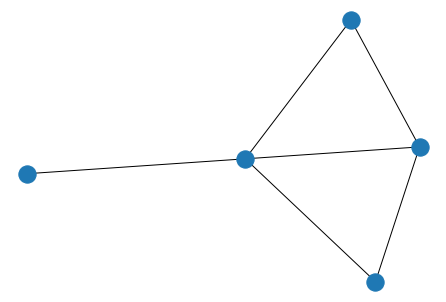

In [17]:
import matplotlib.pyplot as plt

plt.clf() # on efface
nx.draw(G)
plt.show()


C'est bien mais il nous manque les noms des sommets !

Heureusement il est facile de les afficher :

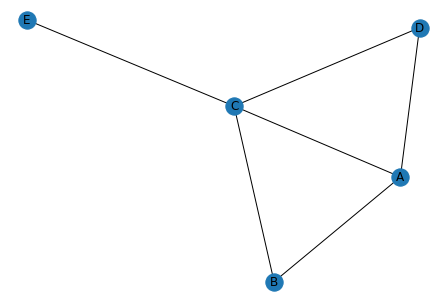

In [18]:
plt.clf() # on efface
nx.draw(G, with_labels=True)
plt.show()

# A faire

Dans la cellule suivante, écrire un script qui génère un graphe :
- avec un nombre aléatoire de sommets compris entre 5 et 10;
- dont les noms de sommets sont des majuscules de l'alphabet;
- avec des arêtes aléatoires mais de chaque sommet doit partir entre 1 et 3 arêtes.

Voici 2 exemples de tels graphes :
![ex1](https://i.postimg.cc/ryJZTQjP/exemple1.png)
![ex2](https://i.postimg.cc/ZK575pDK/exemple2.png)

7
['T', 'J', 'H', 'X', 'O', 'Q', 'S']


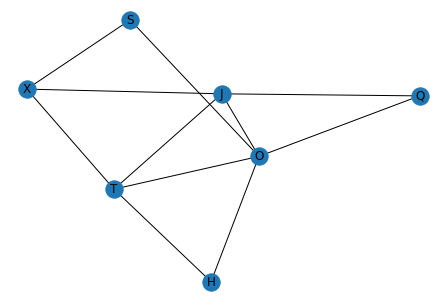

In [19]:
from random import randint, sample

node_name = "AZERTYUIOPQSDFGHJKLMWXCVBN"

n = randint(5, 10)
print(n)
nodes = sample(node_name, n)
print(nodes)
edges = []
for node in nodes:
    remaining_nodes = list(nodes)
    remaining_nodes.remove(node)
    extremities = sample(remaining_nodes, randint(1, 3))
    edges.extend([(node, e) for e in extremities])

plt.clf() # on efface
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True)
plt.show()